In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# read excel file
D = pd.read_excel("../dataset/bmi_data_phw3.xlsx")

In [85]:
#Linear regression modeling function
def modeling(dataset):

    height = dataset['Height (Inches)']
    weight = dataset['Weight (Pounds)']

    reg = linear_model.LinearRegression()
    reg.fit(height[:,np.newaxis], weight) #fit training data

    return reg, height, weight

In [86]:
def plotting(height, weight):
    # range setting min-1 to max+1
    px = np.array([height.min()-1, height.max()+1])
    py = reg.predict(px[:,np.newaxis])
    plt.scatter(height, weight) #plot with scatter plot
    plt.plot(px,py,color="r") #Plot linear model with red color
    plt.xlabel("Height (Inches)")
    plt.ylabel("Weight (Pounds)")
    plt.show()

In [87]:
# Normalization with StandardScaler and predict 0, 4 bmi index
def find_a(E):
    E_temp = np.asarray(E) #create numpy array with dataframe

    scaler = StandardScaler()
    prediction_with_scaler = scaler.fit_transform(E_temp.reshape(-1, 1)).flatten()
    E[:] = prediction_with_scaler #column change

    #plot z

    a = 1.5

    zero_bmi_idx = np.where(E < -a)[0] #find people who have 0 bmi index
    four_bmi_idx = np.where(E > a)[0] #find people who have 4 bmi index

    zi = E.index[zero_bmi_idx]
    fi = E.index[four_bmi_idx]

    return prediction_with_scaler, zi, fi #return people index

In [88]:
#function for display information (reuse)
def display_result(bmi_idx, df_target, bmi):
    print("------Prediction-----")
    print(f'BMI {bmi} prediction =>  {bmi_idx}')
    print("--------Target-------")
    print(df_target[df_target["BMI"] == bmi])

In [89]:
#split dataset into male and female
df_male = D[D["Sex"] == "Male"]
df_female = D[D["Sex"] == "Female"]

/var/folders/2g/lnwzhq354cgb0l80t1dhm59m0000gn/T/ipykernel_67758/3394664928.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reg.fit(height[:,np.newaxis], weight) #fit training data


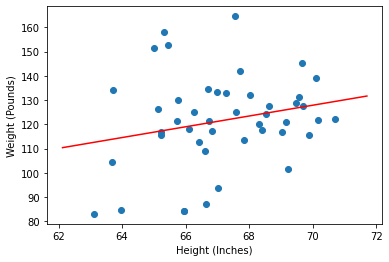

3    -33.458101
7     -5.047372
10    -7.129415
13     8.716439
14     1.937096
15    -9.317412
21   -24.731158
23     0.471322
24    -4.084160
26   -29.640127
27    20.142333
29    10.828597
30   -11.540474
32    11.071961
35    34.601043
36   -27.459251
39    13.878349
40    -1.308225
41    18.316108
43     0.867816
44    -9.221896
46    -7.259939
47    -1.748829
48     4.380142
52   -34.516809
57    -3.660349
58    34.856749
59     5.525156
61    11.649073
62    12.064594
64     2.899241
65     9.279601
69   -29.544668
70     3.083568
71     2.567306
73    -0.457376
76    42.098673
83    -0.288646
84    -8.768621
86    19.095494
87    -6.274072
91   -11.984007
92    -6.800080
94    40.427141
97   -34.516809
Name: Weight (Pounds), dtype: float64
------Prediction-----
BMI 0 prediction =>  [ 3 26 52 69 97]
--------Target-------
     Sex  Age  Height (Inches)  Weight (Pounds)  BMI
3   Male   24          66.6432          86.9820    0
21  Male   30          69.2302         101.4527    0
2

/var/folders/2g/lnwzhq354cgb0l80t1dhm59m0000gn/T/ipykernel_67758/2554120413.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  predicted_y=reg.predict(height[:,np.newaxis])


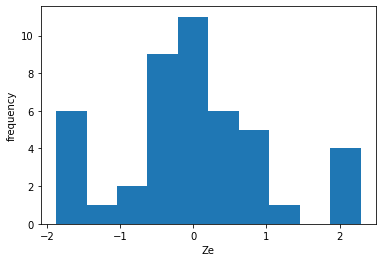

In [97]:
reg, height, weight = modeling(df_male) #find linear model

plotting(height, weight)
# predict weight
predicted_y=reg.predict(height[:,np.newaxis])
# calculate E (weight – predicted weight)
E = weight - predicted_y

print(E)

prediction_with_scaler, male_zero_bmi_idx, male_four_bmi_idx = find_a(E) # find people who have  0, 4 bmi

plt.hist(prediction_with_scaler, bins=10)
plt.xlabel('Ze')
plt.ylabel('frequency')

display_result(male_zero_bmi_idx.values, df_male, 0) #print male with 0 bmi index information
print()
display_result(male_four_bmi_idx.values, df_male, 4) #print male with 4 bmi index information

/var/folders/2g/lnwzhq354cgb0l80t1dhm59m0000gn/T/ipykernel_67758/3394664928.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reg.fit(height[:,np.newaxis], weight) #fit training data


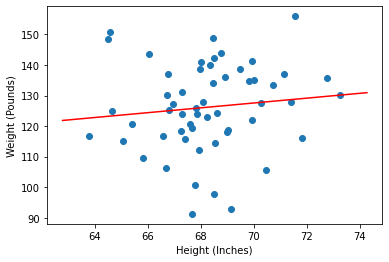

0     -5.891648
1      0.143064
2      8.653761
4     11.609544
5    -28.507036
6     -8.675466
8     -8.083941
9    -18.700602
11   -22.149799
12    27.155580
16    -1.856321
17    13.769144
18     2.052799
19     1.625049
20   -12.072089
22    15.807450
25    22.609198
28    19.095491
31     7.685271
33   -12.931844
34   -14.606504
37    -8.087059
38    -3.020763
42     6.016233
45   -13.870666
49     5.189927
50    -0.779018
51    -8.797802
53    15.114436
54    -5.500928
55   -25.168676
56    -5.005792
60    12.140651
63    12.581616
66     1.924741
67    27.431091
68    13.677083
72     5.827439
74    -1.368846
75     0.009800
77     0.120618
78     9.507119
79    -0.357323
80   -34.442297
81    17.291040
82     7.437887
85     7.371030
88    -3.333661
89    -9.840070
90   -34.118466
93    -6.872157
95     5.146713
96    -6.185768
98    -2.060413
99    25.291180
Name: Weight (Pounds), dtype: float64
------Prediction-----
BMI 0 prediction =>  [ 5 11 55 80 90]
--------Target-------


/var/folders/2g/lnwzhq354cgb0l80t1dhm59m0000gn/T/ipykernel_67758/3070478428.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  predicted_y=reg.predict(height[:, np.newaxis])


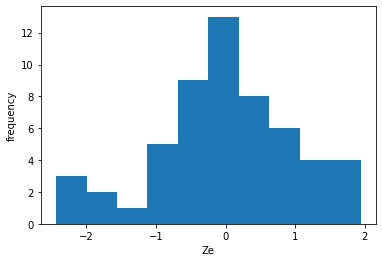

In [98]:
reg, height, weight = modeling(df_female) #find linear model

plotting(height, weight)
# predict weight
predicted_y=reg.predict(height[:, np.newaxis])
# calculate E (weight – predicted weight)
E = weight - predicted_y
print(E)

prediction_with_scaler, female_zero_bmi_idx, female_four_bmi_idx = find_a(E) #find people who have 0, 4 bmi

plt.hist(prediction_with_scaler, bins=10)
plt.xlabel('Ze')
plt.ylabel('frequency')

display_result(female_zero_bmi_idx.values, df_female, 0) #print female with 0 bmi index information
print()
display_result(female_four_bmi_idx.values, df_female, 4) #print female with 4 bmi index information